In [1]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

In [ ]:
# Simuliamo un segnale casuale normalizzato tra [-1, 1]
fs = 50000  # Frequenza di campionamento
T = 5        # Durata in secondi
N = fs * T   # Numero di punti
time = np.linspace(0, T, N)
signal = np.sin(2 * np.pi * 50 * time) + 0.5 * np.sin(2 * np.pi * 1000 * time)  # Mix di 50Hz e 1000Hz
wavelet = 'db4'
level = 6  # Numero di livelli di decomposizione

In [ ]:
coeffs = pywt.wavedec(signal, wavelet, level=level)

<class 'list'>


In [11]:
len(signal)

250000

In [22]:
len(coeffs)

7

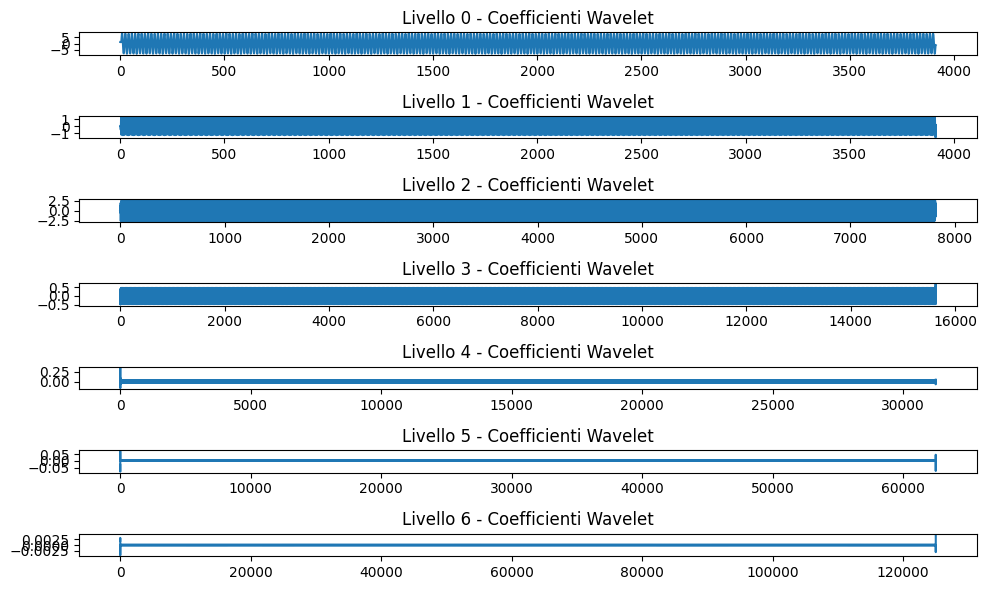

In [12]:
# Visualizzazione dei coefficienti
plt.figure(figsize=(10, 6))
for i, c in enumerate(coeffs):
    plt.subplot(level + 1, 1, i + 1)
    plt.plot(c)
    plt.title(f'Livello {i} - Coefficienti Wavelet')
plt.tight_layout()
plt.show()

In [18]:
from sklearn.preprocessing import MinMaxScaler

# Normalizzazione dei coefficienti wavelet per stabilità numerica
scalers = [MinMaxScaler(feature_range=(-1, 1)) for _ in range(len(coeffs))]
coeffs_scaled = [scaler.fit_transform(c.reshape(-1, 1)).flatten() for scaler, c in zip(scalers, coeffs)]

# Ricostruzione della serie da coefficienti per il dataset
transformed_signal = np.hstack(coeffs_scaled)

In [20]:
len(transformed_signal)

250040

In [ ]:
# Creazione delle sequenze per il modello LSTM
def create_sequences(data, seq_length=100):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])  # Previsione a un passo avanti
    return np.array(X), np.array(y)

seq_length = 200
X, y = create_sequences(transformed_signal, seq_length)

# Reshape per compatibilità con LSTM
X = X.reshape((X.shape[0], X.shape[1], 1))  # (samples, timesteps, features)

print(f"Dataset Shape - X: {X.shape}, y: {y.shape}")

Dataset Shape - X: (249840, 200, 1), y: (249840,)
